In [13]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# Features in the model: 
# 1- Applicatin type , 2-afliation, 3-classification,4- use case, 5- organization,6- status, 7-income amount, 8- special considerations, 9- ask amount
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
ids = application_df[['EIN', 'NAME']]
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [24]:
# Determine the number of unique values: 
for col in application_df:
    print(f'number of unique items in {col}, is {len(application_df[col].unique())}')

number of unique items in APPLICATION_TYPE, is 9
number of unique items in AFFILIATION, is 6
number of unique items in CLASSIFICATION, is 6
number of unique items in USE_CASE, is 5
number of unique items in ORGANIZATION, is 4
number of unique items in STATUS, is 2
number of unique items in INCOME_AMT, is 9
number of unique items in SPECIAL_CONSIDERATIONS, is 2
number of unique items in ASK_AMT, is 8747
number of unique items in IS_SUCCESSFUL, is 2


In [25]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_counts

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

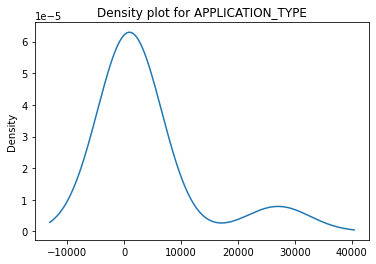

In [26]:
## Visualize the APPLICATION_TYPE value counts

app_type_counts.plot.density()
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

In [28]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 500].index)
print(application_types_to_replace)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

['Other']


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

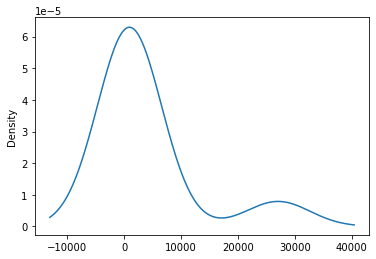

In [16]:
# Visualize the APPLICATION_TYPE value counts after binning
application_df['APPLICATION_TYPE'].value_counts().plot.density()

In [17]:
# Look at CLASSIFICATION value counts for binning
app_class_counts = application_df.CLASSIFICATION.value_counts()
app_class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# You may find it helpful to look at CLASSIFICATION value counts >1
app_class_counts[app_class_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

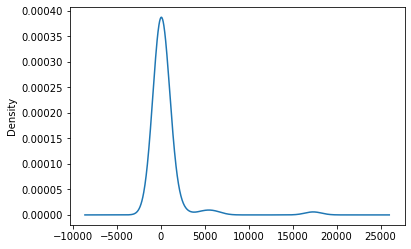

In [19]:
# Visualize the CLASSIFICATION value counts
app_class_counts.plot.density()

In [20]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(app_class_counts[app_class_counts < 1000].index)
print(classifications_to_replace)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

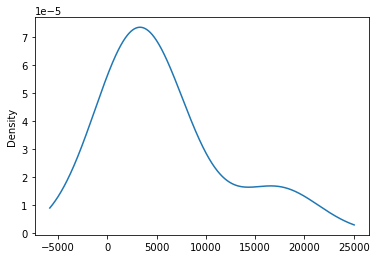

In [21]:
# Visualize the CLASSIFICATION value counts after binning
application_df['CLASSIFICATION'].value_counts().plot.density()

In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy = pd.get_dummies(application_df)
dummy.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
# Split our preprocessed data into our features and target arrays
X = dummy.drop('IS_SUCCESSFUL', axis=1)
y = dummy['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
#compile, train and evaluate the model:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train_scaled.shape[1]
hid_nodes_l1 = 10
hid_nodes_l2 = 8
hid_nodes_l3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l1, activation='relu', input_shape=(num_features,)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                440       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5920 - accuracy: 0.7006
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5641 - accuracy: 0.7255
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5594 - accuracy: 0.7264
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7264
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7286
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7284
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7290
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7289
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7300
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accura

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5546 - accuracy: 0.7291 - 330ms/epoch - 1ms/step
Loss: 0.554578959941864, Accuracy: 0.7290962338447571


In [37]:
# Export our model to HDF5 file
nn.save("trained_application.h5")

Model Optimization

In [38]:
# Inspect features for potential variables to bin

for col in application_df.columns:
    print(application_df[col].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+             

Min amount: 5000
Max amount: 8597806340


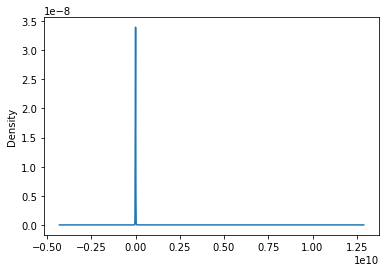

In [39]:
# A huge proportion of applications were for $5000 exactly. 
# Try binning the amount column to see if it improves the model.
application_df.ASK_AMT.plot.density()
print(f"Min amount: {application_df.ASK_AMT.min()}")
print(f"Max amount: {application_df.ASK_AMT.max()}")

In [40]:
# Bin the ASK_AMT column
amount_nums = application_df.ASK_AMT
application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=[0, 5001, 100000, 10000000000], labels=['5000', '50001-100000', '10000+'])
application_df['ASK_AMT'].value_counts()

5000            25399
10000+           4531
50001-100000     4369
Name: ASK_AMT, dtype: int64

In [41]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy = pd.get_dummies(application_df)
dummy.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_50001-100000,ASK_AMT_10000+
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
# Split our preprocessed data into our features and target arrays
X = dummy.drop('IS_SUCCESSFUL', axis=1)
y = dummy['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train_scaled.shape[1]
hid_nodes_l1 = 10
hid_nodes_l2 = 8
hid_nodes_l3 = 6

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(hid_nodes_l1, activation='relu', input_shape=(num_features,)))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(hid_nodes_l2, activation='relu'))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(hid_nodes_l3, activation='relu'))

# Output layer
nn1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
nn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                460       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
nn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
fit_model = nn1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6836
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5672 - accuracy: 0.7201
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7295
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7316
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accura

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5541 - accuracy: 0.7270 - 283ms/epoch - 1ms/step
Loss: 0.5541215538978577, Accuracy: 0.7269970774650574


Binnig the ask_amt did not improve the model, so revert to the original data not the binned one.

In [47]:
application_df.ASK_AMT = amount_nums

# Convert categorical data to numeric with `pd.get_dummies`
dummy = pd.get_dummies(application_df)

# Split our preprocessed data into our features and target arrays
X = dummy.drop('IS_SUCCESSFUL', axis=1)
y = dummy['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Add a hidden layer to the model
num_features = X_train_scaled.shape[1]
hid_nodes_l1 = 10
hid_nodes_l2 = 8
hid_nodes_l3 = 6
hid_nodes_l4 = 4

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(hid_nodes_l1, activation='relu', input_shape=(num_features,)))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(hid_nodes_l2, activation='relu'))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(hid_nodes_l3, activation='relu'))

# Output layer
nn2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                440       
                                                                 
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 589
Trainable params: 589
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6220 - accuracy: 0.6818
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.7240
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5598 - accuracy: 0.7278: 0s - loss: 0.5606 - accura
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7302
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7293
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7296
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5515 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7311
Epoch 10/100
804/804 [==============================] - 1s 1ms/

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5567 - accuracy: 0.7284 - 285ms/epoch - 1ms/step
Loss: 0.5567280650138855, Accuracy: 0.728396475315094


In [51]:
# Add more nodes
# Define the model 
num_features = X_train_scaled.shape[1]
hid_nodes_l1 = 10
hid_nodes_l2 = 10
hid_nodes_l3 = 10
hid_nodes_l4 = 10

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(hid_nodes_l1, activation='relu', input_shape=(num_features,)))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(hid_nodes_l2, activation='relu'))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(hid_nodes_l3, activation='relu'))

# Output layer
nn3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                440       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6768
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5626 - accuracy: 0.7273
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7274
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7302
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7298
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7303
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accura

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5563 - accuracy: 0.7276 - 273ms/epoch - 1ms/step
Loss: 0.5562920570373535, Accuracy: 0.727580189704895
